# Sentimen Analysis IMBD (Internet Movie Database) with MNB, RF, LR
- https://www.kaggle.com/code/arindamdas07/imdb-movie-reviews-using-logistic-regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
### Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score,accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

## Data Acquisition

In [3]:
# read csv
df = pd.read_csv('dataset/IMDB_Dataset.csv')

In [4]:
# view dimension data
print(df.shape)

(50000, 2)


In [5]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

sentiment
negative    25000
positive    25000
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

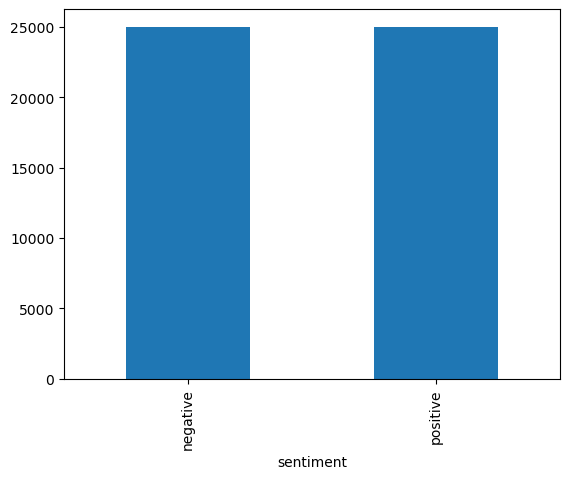

In [7]:
print(df.value_counts('sentiment'))
df.value_counts('sentiment').plot(kind='bar')

## Preprocessing Data

In [8]:
### Preprocessing Function
ps = PorterStemmer()
corpus = set()
def preprocess(text):
    
    ## removing unwanted space
    text = text.strip()
    
    ## removing html tags 
    text = re.sub("<[^>]*>", "",text)
    
    ## removing any numerical values
    text = re.sub('[^a-zA-Z]', ' ',text)
    
    ## lower case the word
    text = text.lower()
    
    text = text.split()
    
    ## stemming the word for sentiment analysis do not remove the stop word
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [9]:
df['Preprocessed_review'] = df.review.apply(preprocess)

In [10]:
map_dict = {'positive':1,
           'negative':0}
df['sentiment_numeric'] = df.sentiment.map(map_dict)
df.head()

,review,sentiment,Preprocessed_review,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,one of the other review ha mention that after ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonder littl product the film techniqu is ve...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought thi wa a wonder way to spend time on...,1
3,Basically there's a family where a little boy ...,negative,basic there s a famili where a littl boy jake ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,1


## Spliting Data

In [11]:
### performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Preprocessed_review	,
                                                 df.sentiment_numeric,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=df.sentiment_numeric)

In [12]:
x_train.shape,x_test.shape

((40000,), (10000,))

## Naive Bayes Algorithm

In [13]:
multi_nb = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('Multi_NB', MultinomialNB())         
])

multi_nb.fit(x_train, y_train)


y_pred_mnb = multi_nb.predict(x_test)

print(f'multi naive bayes precision: {precision_score(y_test,y_pred_mnb)}')
print(f'multi naive bayes accuracy: {accuracy_score(y_test,y_pred_mnb)}')

multi naive bayes precision: 0.8742151527835914
multi naive bayes accuracy: 0.8576


In [14]:
confusion_mat_nbc = confusion_matrix(y_test, y_pred_mnb)

In [15]:
confusion_mat_nbc

array([[4399,  601],
       [ 823, 4177]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

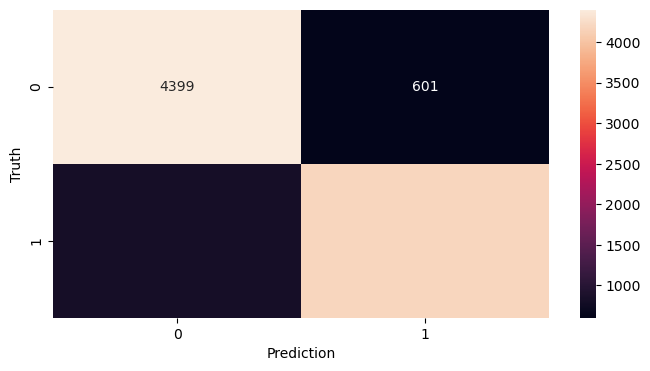

In [16]:
plt.figure(figsize = (8,4))
sn.heatmap(confusion_mat_nbc, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_mnb)
print("Classification Report:\n", report)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      5000
           1       0.87      0.84      0.85      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Random Forest Algorithm

In [18]:
rfc = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('rf', RandomForestClassifier(random_state=42))         
])

rfc.fit(x_train, y_train)


y_pred_rfc = rfc.predict(x_test)

print(f'RandomForest Classifier precision: {precision_score(y_test,y_pred_rfc)}')
print(f'RandomForest Classifier accuracy: {accuracy_score(y_test,y_pred_rfc)}')

RandomForest Classifier precision: 0.8499696294796517
RandomForest Classifier accuracy: 0.8457


In [19]:
confusion_mat_rf = confusion_matrix(y_test, y_pred_rfc)

In [20]:
confusion_mat_rf

array([[4259,  741],
       [ 802, 4198]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

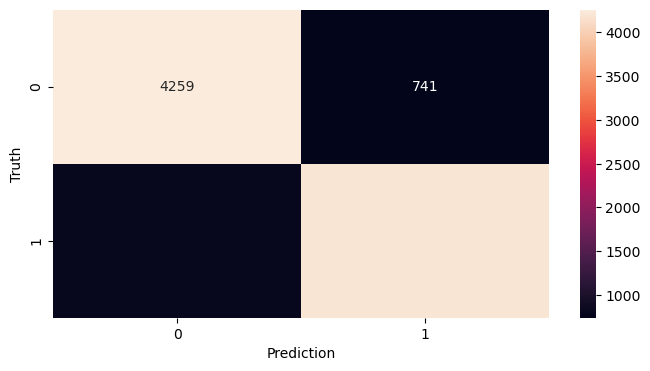

In [21]:
plt.figure(figsize = (8,4))
sn.heatmap(confusion_mat_rf, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      5000
           1       0.85      0.84      0.84      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Logistic Regression Algorithm

In [23]:
lr = Pipeline([
     ('tfidf',TfidfVectorizer()),        
     ('log_reg', LogisticRegression())         
])

lr.fit(x_train, y_train)


y_pred_lr = lr.predict(x_test)

print(f'Logistic Regression precision: {precision_score(y_test,y_pred_lr)}')
print(f'Logistic Regression accuracy: {accuracy_score(y_test,y_pred_lr)}')

Logistic Regression precision: 0.8894581280788177
Logistic Regression accuracy: 0.8953


In [24]:
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

In [25]:
confusion_mat_lr

array([[4439,  561],
       [ 486, 4514]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

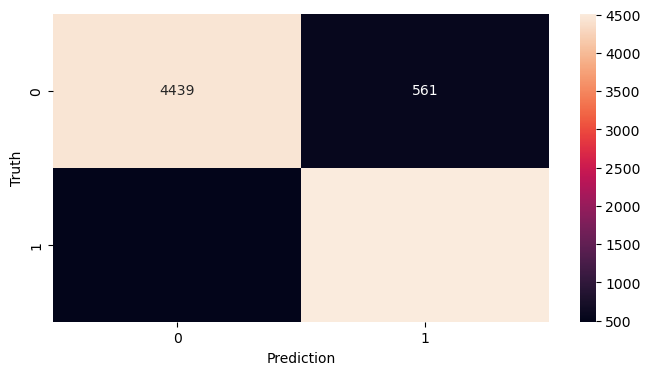

In [26]:
plt.figure(figsize = (8,4))
sn.heatmap(confusion_mat_lr, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", report)

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      5000
           1       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Evaluasi Model

In [28]:
report_df = pd.DataFrame({'model':['Random Forest', 'Multi Naive Bayes','Logistic Regression'],
                          'Precision': [precision_score(y_test,y_pred_rfc),precision_score(y_test,y_pred_mnb),precision_score(y_test,y_pred_lr)],
                          'Accuracy':[accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_mnb),accuracy_score(y_test,y_pred_lr)]})
report_df

,model,Precision,Accuracy
0,Random Forest,0.849970,0.8457
1,Multi Naive Bayes,0.874215,0.8576
2,Logistic Regression,0.889458,0.8953
